In [1]:
import pandas as pd
df = pd.read_pickle('../data/intersection_of_visits.pkl')

Now the dataframe contains all sendBeacon calls grouped for each visit made, here we explode the dataframe and make a row for every single sendBeacon call.

In [2]:
sources = []
arguments = []

def create_list(row):
    if row:
        if row['savedCalls']:
            return row['savedCalls']
    return [{}]

df_exploded = df.copy()
df_exploded['apis'] = df_exploded['apis'].map(lambda x: create_list(x))
df_exploded = df_exploded.explode('apis')

def get_sources(row):
    if row['apis']:
        if row['apis']['source']:
            return row['apis']['source']
    return ''

df_exploded['source'] = df_exploded.apply(lambda x: get_sources(x), axis=1)

def get_first_argument(row):
    if row['apis']:
        if row['apis']['arguments']:
            return row['apis']['arguments'][0]
    return []

df_exploded['target'] = df_exploded.apply(lambda x: get_first_argument(x), axis=1)

def get_second_argument(row):
    if row['apis']:
        if row['apis']['arguments']:
            if len(row['apis']['arguments']) > 1:
                return row['apis']['arguments'][1]
    return []

df_exploded['argument'] = df_exploded.apply(lambda x: get_second_argument(x), axis=1)

df_exploded = df_exploded.drop(['cmps', 'requests', 'apis', 'cookies', 'targets'], axis=1)

display(df_exploded)

,initialUrl,finalUrl,autoconsent_action,source,target,argument
0,http://tradplusad.com/,https://www.tradplusad.com/,optIn,,[],[]
1,http://alexa.com/,https://alexa.com/,optIn,,[],[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://cf.bstatic.com/static/js/main_cloudfro...,https://www.booking.com/js_tracking?lang=en-gb...,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://www.googletagmanager.com/gtm.js?id=GTM...,https://www.google.com/pagead/landing?gcs=G11-...,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.analytics.google.com/g/collect...,[]
...,...,...,...,...,...,...
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.analytics.google.com/g/collect...,[]
9616,http://sothebys.com/,https://www.sothebys.com/en/,optOut,,[],[]
9617,http://mozilla.org/,https://www.mozilla.org/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.google-analytics.com/g/collect...,[]
9617,http://mozilla.org/,https://www.mozilla.org/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.google-analytics.com/g/collect...,[]


The above table shows all sendBeacon calls made, now we can map the URLs of these sendBeacon calls to show what entities make and receive sendBeacon calls.

In [3]:
import tldextract
import json

with open('domain_map.json') as f:
    domain_map = json.loads(f.read())

def get_domain(url, default=''):
    if url == [] or url == '':
        url = default
    tld_extract = tldextract.extract(url)
    domain_name = tld_extract.registered_domain
    if domain_name in domain_map:
        return domain_map[domain_name]['entityName']
    else:
        return domain_name

def get_domain_raw(url, default=''):
    if url == [] or url == '':
        url = default
    tld_extract = tldextract.extract(url)
    return tld_extract.registered_domain

df_base_urls = df_exploded.copy()
df_base_urls['source'] = df_exploded.apply(lambda row: get_domain(row['source'], row['initialUrl']), axis=1)
df_base_urls['target'] = df_exploded.apply(lambda row: get_domain(row['target'], row['initialUrl']), axis=1)

display(df_base_urls)

,initialUrl,finalUrl,autoconsent_action,source,target,argument
0,http://tradplusad.com/,https://www.tradplusad.com/,optIn,"Shanghai Shiquan Network Technology Co., Ltd.","Shanghai Shiquan Network Technology Co., Ltd.",[]
1,http://alexa.com/,https://alexa.com/,optIn,"Amazon Technologies, Inc.","Amazon Technologies, Inc.",[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,Booking.com B.V.,Booking.com B.V.,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,Google LLC,Google LLC,[]
2,http://bstatic.com/,https://www.booking.com/index.en-gb.html?label...,optIn,Google LLC,Google LLC,[]
...,...,...,...,...,...,...
9615,http://qortex.ai/,https://www.qortex.ai/,optOut,Google LLC,Google LLC,[]
9616,http://sothebys.com/,https://www.sothebys.com/en/,optOut,"Sotheby's, Inc.","Sotheby's, Inc.",[]
9617,http://mozilla.org/,https://www.mozilla.org/,optOut,Google LLC,Google LLC,[]
9617,http://mozilla.org/,https://www.mozilla.org/,optOut,Google LLC,Google LLC,[]


Here we display some basic numbers about the entities:

In [4]:
print("SendBeacon calls analysed: " + str(len(df_base_urls.groupby(['initialUrl']))))
print("Num. of different sources making sendBeacon calls: " + str(len(df_base_urls.groupby(['source']))))
print("Num. of different targets receiving sendBeacon calls: " + str(len(df_base_urls.groupby(['target']))))
display(df_base_urls['target'].value_counts())

SendBeacon calls analysed: 9563
Num. of different sources making sendBeacon calls: 4191
Num. of different targets receiving sendBeacon calls: 3997


target
Google LLC               35939
                         33793
ByteDance Ltd.            3217
Criteo SA                 2806
Microsoft Corporation     2530
                         ...  
Instacart                    1
Dep. IT Tribun               1
University of Bristol        1
lolesports.com               1
click.ro                     1
Name: count, Length: 3997, dtype: int64

This code counts the number of visits that contains a sendBeacon call made by a source.

In [5]:
sources_optIn = {}
sources_optOut = {}

def get_sources_count(frame, sources):
    items = frame.source.value_counts().items()
    for item, _ in items:
        if not item in sources:
            sources[item] = 0
        sources[item] += 1

df_grouped = df_base_urls[df_base_urls['autoconsent_action'] == 'optIn'].groupby(['initialUrl']).apply(lambda frame: get_sources_count(frame, sources_optIn))
sources_optIn = list(reversed(sorted(sources_optIn.items(), key=lambda item: item[1])))

df_grouped = df_base_urls[df_base_urls['autoconsent_action'] == 'optOut'].groupby(['initialUrl']).apply(lambda frame: get_sources_count(frame, sources_optOut))
sources_optOut = list(reversed(sorted(sources_optOut.items(), key=lambda item: item[1])))


import numpy as np
NR_ITEMS_IN_GRAPH = 7
ind = np.arange(NR_ITEMS_IN_GRAPH)
labels = []

counts_optIn = []
for index, (item, count) in enumerate(sources_optIn):
    if index >= NR_ITEMS_IN_GRAPH:
        break
    counts_optIn.append(count)
    labels.append(item)

counts_optOut = []
for index, (item, count) in enumerate(sources_optOut):
    if index >= NR_ITEMS_IN_GRAPH:
        break
    counts_optOut.append(count)

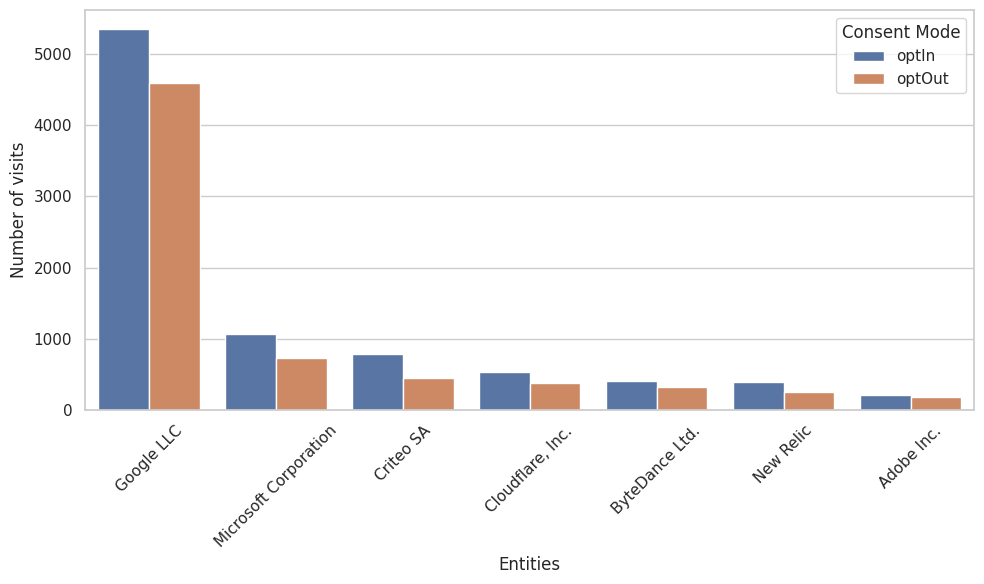

In [6]:
import matplotlib.pyplot as plt

sns_data = {
    'optIn': counts_optIn,
    'optOut': counts_optOut
}
import seaborn as sns

# Create a DataFrame for each consent mode
sns_df_optIn = pd.DataFrame({'Entity': labels, 'Count': sns_data['optIn'], 'Consent Mode': 'optIn'})
sns_df_optOut = pd.DataFrame({'Entity': labels, 'Count': sns_data['optOut'], 'Consent Mode': 'optOut'})

# Concatenate the DataFrames
sns_df_concatenated = pd.concat([sns_df_optIn, sns_df_optOut])

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Entity', y='Count', hue='Consent Mode', data=sns_df_concatenated)
plt.xlabel('Entities')
plt.ylabel('Number of visits')
plt.xticks(rotation=45)
plt.legend(title='Consent Mode')
plt.tight_layout()
plt.show()

This code does the same but now it counts the number of visits containing a sendBeacon call towards every target.

In [7]:
targets_optIn = {}
targets_optOut = {}

def get_targets_count(frame, targets):
    items = frame.target.value_counts().items()
    for item, _ in items:
        if item == "":
            item = "First parties"
        if not item in targets:
            targets[item] = 0
        targets[item] += 1

df_grouped = df_base_urls[df_base_urls['autoconsent_action'] == 'optIn'].groupby(['initialUrl']).apply(lambda frame: get_targets_count(frame, targets_optIn))
targets_optIn = list(reversed(sorted(targets_optIn.items(), key=lambda item: item[1])))

df_grouped = df_base_urls[df_base_urls['autoconsent_action'] == 'optOut'].groupby(['initialUrl']).apply(lambda frame: get_targets_count(frame, targets_optOut))
targets_optOut = list(reversed(sorted(targets_optOut.items(), key=lambda item: item[1])))

NR_ITEMS_IN_GRAPH = 10
ind = np.arange(NR_ITEMS_IN_GRAPH)
labels = []

counts_optIn = []
for index, (item, count) in enumerate(targets_optIn):
    if index >= NR_ITEMS_IN_GRAPH:
        break
    counts_optIn.append(count)
    labels.append(item)

counts_optOut = []
for index, (item, count) in enumerate(targets_optOut):
    if index >= NR_ITEMS_IN_GRAPH:
        break
    counts_optOut.append(count)

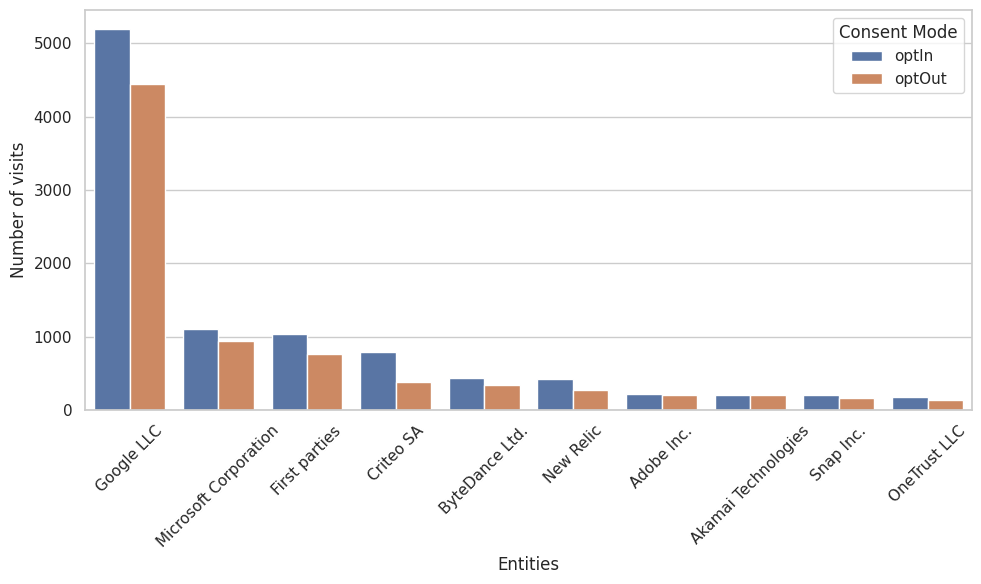

In [8]:
sns_data = {
    'optIn': counts_optIn,
    'optOut': counts_optOut
}

# Create a DataFrame for each consent mode
sns_df_optIn = pd.DataFrame({'Entity': labels, 'Count': sns_data['optIn'], 'Consent Mode': 'optIn'})
sns_df_optOut = pd.DataFrame({'Entity': labels, 'Count': sns_data['optOut'], 'Consent Mode': 'optOut'})

# Concatenate the DataFrames
sns_df_concatenated = pd.concat([sns_df_optIn, sns_df_optOut])

# Plotting using Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Entity', y='Count', hue='Consent Mode', data=sns_df_concatenated)
plt.xlabel('Entities')
plt.ylabel('Number of visits')
plt.xticks(rotation=45)
plt.legend(title='Consent Mode')
plt.tight_layout()
plt.show()